## Venn diagrams

https://github.com/LankyCyril/pyvenn/blob/master/pyvenn-demo.ipynb

In [1]:
import sys
sys.path.append('/Users/jrm/Desktop/Foodome/pyTools/scripts/')

In [2]:
from venn import venn
import matplotlib.pyplot as plt

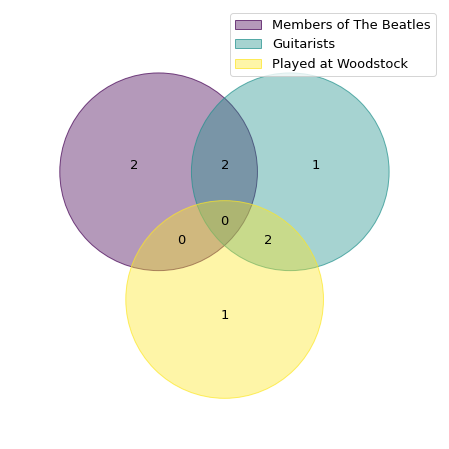

In [3]:
musicians = {
    "Members of The Beatles": {"Paul McCartney", "John Lennon", "George Harrison", "Ringo Starr"},
    "Guitarists": {"John Lennon", "George Harrison", "Jimi Hendrix", "Eric Clapton", "Carlos Santana"},
    "Played at Woodstock": {"Jimi Hendrix", "Carlos Santana", "Keith Moon"}
}
venn(musicians)
import matplotlib.pyplot as plt

In [11]:
from matplotlib.pyplot import subplots
from itertools import chain, islice
from string import ascii_uppercase
from numpy.random import choice

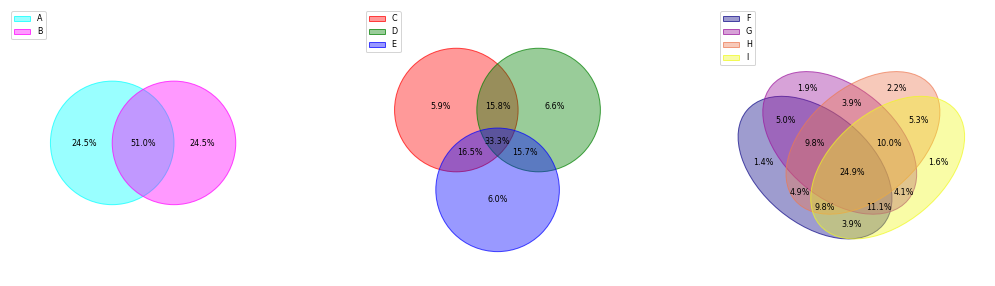

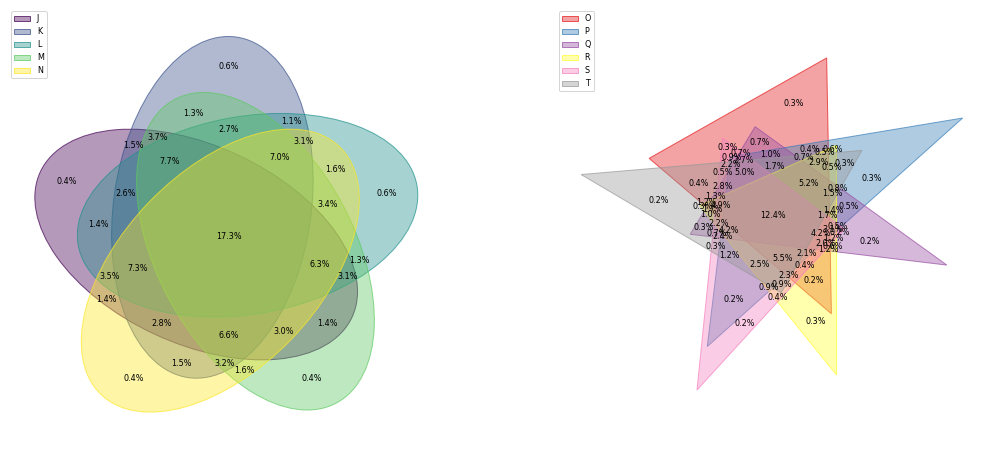

In [12]:
_, top_axs = subplots(ncols=3, nrows=1, figsize=(18, 5))
_, bot_axs = subplots(ncols=2, nrows=1, figsize=(18, 8))
cmaps = ["cool", list("rgb"), "plasma", "viridis", "Set1"]
letters = iter(ascii_uppercase)

for n_sets, cmap, ax in zip(range(2, 7), cmaps, chain(top_axs, bot_axs)):
    dataset_dict = {
        name: set(choice(1000, 700, replace=False))
        for name in islice(letters, n_sets)
    }
    venn(dataset_dict, fmt="{percentage:.1f}%", cmap=cmap, fontsize=8, legend_loc="upper left", ax=ax)

<AxesSubplot:>

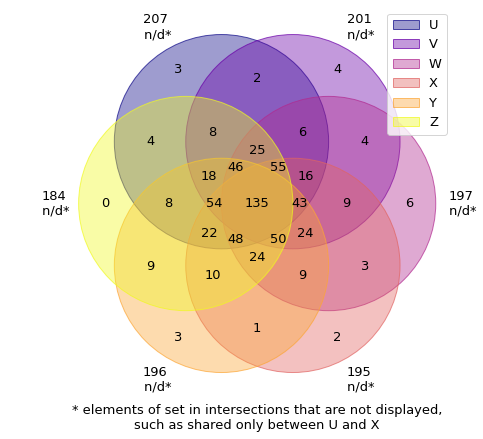

In [13]:
from venn import pseudovenn

dataset_dict = {
    name: set(choice(1000, 700, replace=False))
    for name in islice(letters, 6)
}
pseudovenn(dataset_dict, cmap="plasma")

In [14]:
from venn import generate_petal_labels, draw_venn, generate_colors

dataset_dict = {
    name: set(choice(1000, 250, replace=False))
    for name in list("αβγ")
}

petal_labels = generate_petal_labels(dataset_dict.values(), fmt="{size}")
petal_labels


{'001': '145',
 '010': '135',
 '011': '48',
 '100': '137',
 '101': '46',
 '110': '56',
 '111': '11'}

In [15]:
significance_filter = lambda value: value if int(value) >= 45 else "ns"
petal_labels = {
    logic: significance_filter(value)
    for logic, value in petal_labels.items()
}
for logic in "001", "010", "100":
    del petal_labels[logic]
petal_labels

{'011': '48', '101': '46', '110': '56', '111': 'ns'}

<AxesSubplot:>

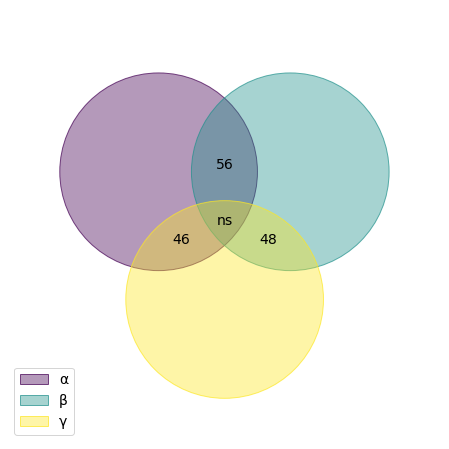

In [16]:
draw_venn(
    petal_labels=petal_labels, dataset_labels=dataset_dict.keys(),
    hint_hidden=False, colors=generate_colors(n_colors=3),
    figsize=(8, 8), fontsize=14, legend_loc="best", ax=None
)

## Alluvial/Sankey diagrams

https://github.com/vinsburg/alluvial_diagram

In [10]:
import alluvial
import matplotlib.pyplot as plt
import matplotlib.cm
import numpy as np

In [1]:
# Generating the input_data:
seed=7
np.random.seed(seed)
def rand_letter(num): return chr(ord('A')+int(num*np.random.rand()))

input_data = [[rand_letter(15), rand_letter(5)*2,rand_letter(5)*3] for _ in range(50)]

input_data[0:5]

[['B', 'DD', 'CCC'],
 ['K', 'EE', 'CCC'],
 ['H', 'AA', 'BBB'],
 ['H', 'DD', 'EEE'],
 ['F', 'AA', 'BBB']]

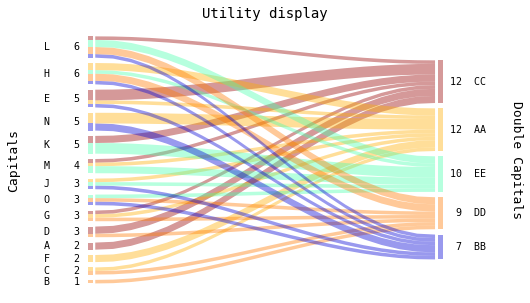

In [14]:
# Plotting:
cmap = matplotlib.cm.get_cmap('jet')
ax = alluvial.plot(
    input_data,  alpha=0.4, color_side=1, rand_seed=seed, figsize=(7,5),
    disp_width=True, wdisp_sep=' '*2, cmap=cmap, fontname='Monospace',
    labels=('Capitals', 'Double Capitals'), label_shift=2)
ax.set_title('Utility display', fontsize=14, fontname='Monospace')
plt.show()

In [25]:
alluvPrep = lambda x: tuple(x[0:2],x[1:3])

In [33]:
def alluvPrep(x):
    x = list(x)
    return 

In [57]:
res = []
for x in input_data:
    res.append([tuple(x[0:2]),tuple(x[1:3])])
#res = sum(res,[])

<AxesSubplot:>

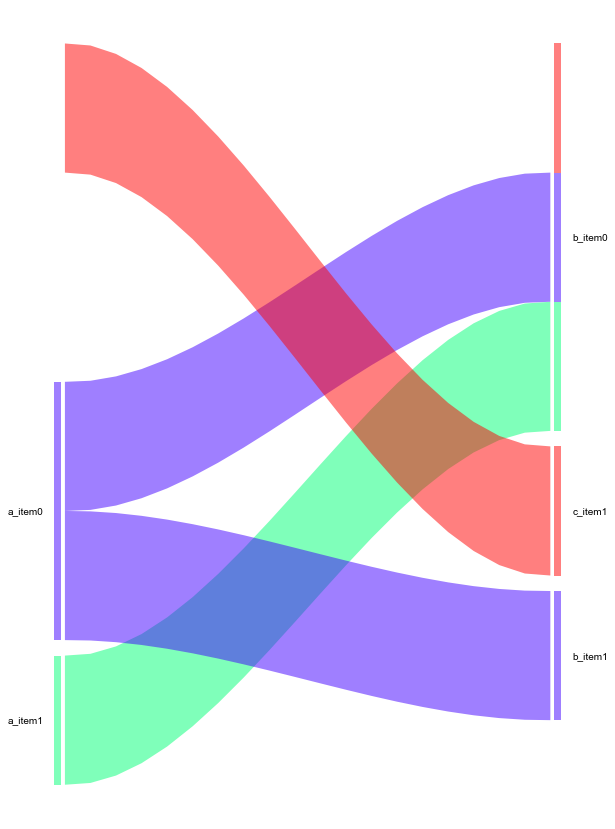

In [60]:
alluvial.plot( [('a_item0', 'b_item0'),
                ('a_item0', 'b_item1') ,
                ('b_item0', 'c_item1') ,
                ('a_item1', 'b_item0')] )

### Sankey diagram 

https://medium.com/kenlok/how-to-create-sankey-diagrams-from-dataframes-in-python-e221c1b4d6b0

In [63]:
def genSankey(df,cat_cols=[],value_cols='',title='Sankey Diagram'):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#4B8BBE','#306998','#FFE873','#FFD43B','#646464']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )
    
    layout =  dict(
        title = title,
        font = dict(
          size = 10
        )
    )
       
    fig = dict(data=[data], layout=layout)
    return fig

In [67]:
import pandas as pd
import plotly
import chart_studio.plotly as py

In [84]:
df = pd.DataFrame([[rand_letter(15), 
               rand_letter(5)*2,
               rand_letter(5)*3] for _ in range(25)])
df['val']=np.random.randint(1,20,25)
df.columns = ['l1','l2','l3','val']
df.head()

,l1,l2,l3,val
0,L,AA,AAA,5
1,H,BB,AAA,8
2,G,AA,AAA,2
3,K,DD,BBB,9
4,F,EE,EEE,9


In [98]:
df.sort_values('l2')

,l1,l2,l3,val
0,L,AA,AAA,5
20,J,AA,CCC,11
19,E,AA,BBB,15
18,O,AA,DDD,12
17,D,AA,EEE,18
9,I,AA,BBB,7
7,O,AA,AAA,1
24,O,AA,BBB,2
2,G,AA,AAA,2
16,C,BB,CCC,17


In [96]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
### Inline Jupyter notebook

In [97]:
fig = genSankey(df,cat_cols=['l1','l2','l3'],value_cols='val',title='Sankey')
plotly.offline.iplot(fig, validate=False)

### Circos

https://github.com/ericmjl/Circos/blob/master/examples.ipynb

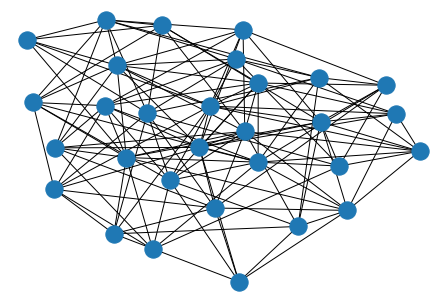

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
er = nx.erdos_renyi_graph(30, 0.3)
nx.draw(er)
plt.show()

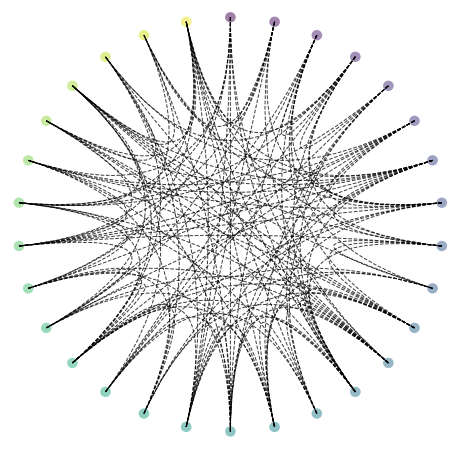

In [31]:
from circos import CircosPlot
nodes = list(er.nodes())
edges = list(er.edges())

nodeprops = dict(facecolor='red', alpha=0.5)
edgeprops = dict(edgecolor='orange', alpha=0.75, ls='--')
###
c = CircosPlot(nodes, edges,10,
               nodecolor=plt.cm.viridis(np.arange(len(nodes)) / len(nodes)),
               edgecolor='black',
               edgeprops=edgeprops,
               nodeprops=nodeprops)
c.draw()

### Radar chart


https://python-graph-gallery.com/390-basic-radar-chart/

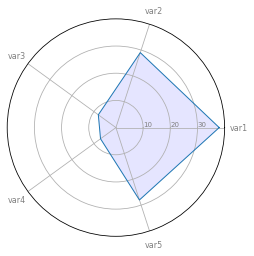

In [3]:

import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)
plt.show()

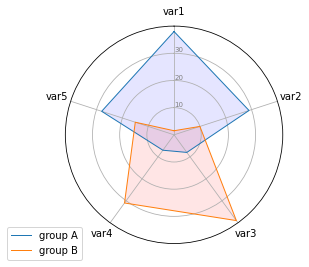

In [5]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
 
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()